

```
Name: Neha Upadhye
Student ID: 1002232340
```



In [24]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree

In [25]:
# Load the dataset
df = pd.read_csv('/content/usethisdataset.csv')

In [26]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'dataset'])

In [27]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [28]:
# Split the dataset into features (X) and target (y)
X = df.drop(columns='y')
y = df['y']

# Split the dataset into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
# Train a Decision Tree Classifier using the entire dataset (Gini)
clf_gini_full = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_full.fit(X_train, y_train)

# Train a Decision Tree Classifier using the entire dataset (Entropy)
clf_entropy_full = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_full.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [30]:
# Get feature importances to determine the top 6 attributes
feature_importances = pd.Series(clf_gini_full.feature_importances_, index=X.columns).sort_values(ascending=False)
top_6_attributes = feature_importances.head(6)

In [31]:
# Create a dataset using only the top 6 features
X_top6 = X[top_6_attributes.index]

In [32]:
# Split the dataset with only the top 6 attributes into training and testing sets
X_train_top6, X_test_top6, y_train_top6, y_test_top6 = train_test_split(X_top6, y, test_size=0.25, random_state=42)

In [33]:
# Train a Decision Tree Classifier using only the top 6 features (Gini)
clf_gini_top6 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_top6.fit(X_train_top6, y_train_top6)

# Train a Decision Tree Classifier using only the top 6 features (Entropy)
clf_entropy_top6 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_top6.fit(X_train_top6, y_train_top6)

DecisionTreeClassifier(criterion='entropy', random_state=42)

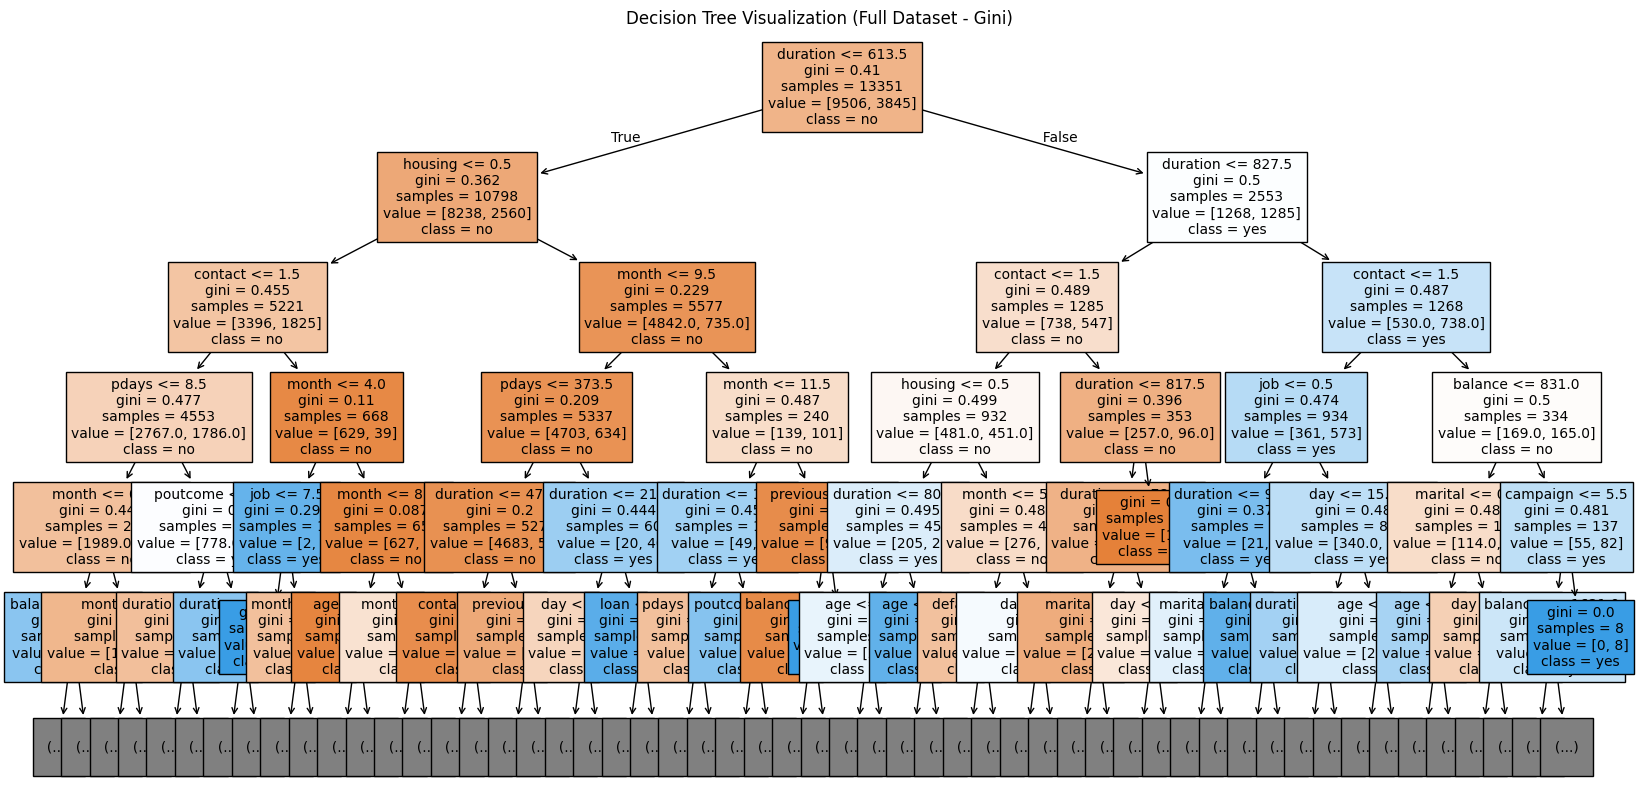

In [34]:
# Visualize the decision tree using the full dataset (Gini)
plt.figure(figsize=(20,10))
tree.plot_tree(clf_gini_full, filled=True, feature_names=X.columns, class_names=label_encoders['y'].classes_, max_depth=5, fontsize=10)
plt.title("Decision Tree Visualization (Full Dataset - Gini)")
plt.show()

The length of the call (duration) is the most important factor. Shorter calls usually lead to a "no" outcome, while longer calls lead to a "yes."

On the Left Side: People without housing loans and using certain contact methods are more likely to say "no."

On the Right Side: Longer calls and specific job types tend to result in a "yes."

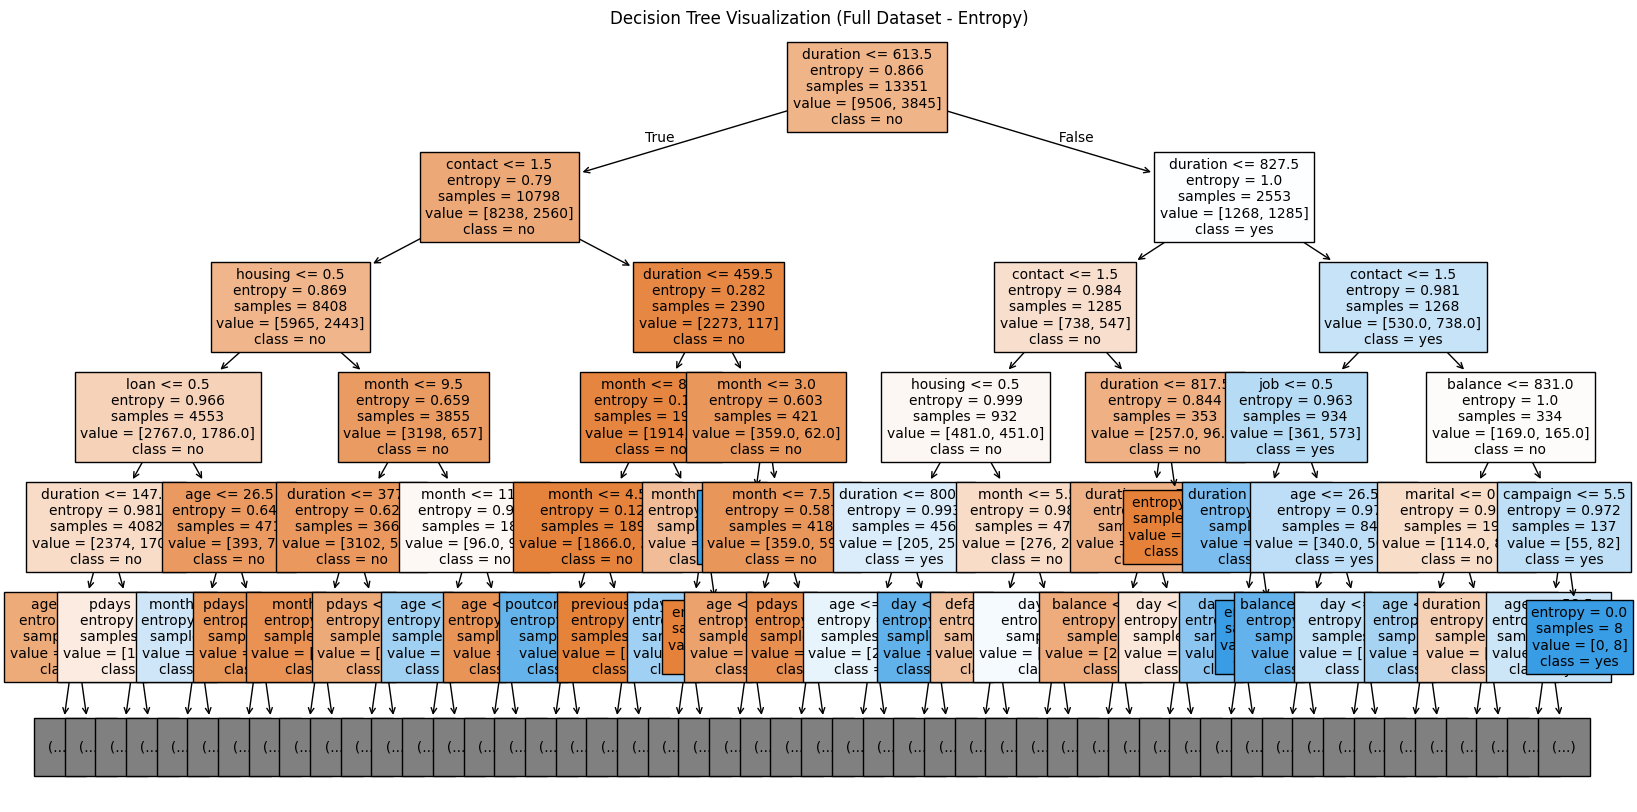

In [35]:
# Visualize the decision tree using the full dataset (Entropy)
plt.figure(figsize=(20,10))
tree.plot_tree(clf_entropy_full, filled=True, feature_names=X.columns, class_names=label_encoders['y'].classes_, max_depth=5, fontsize=10)
plt.title("Decision Tree Visualization (Full Dataset - Entropy)")
plt.show()

Like the Gini tree, call duration is the key factor. Shorter calls result in "no," and longer calls tend to result in "yes."

On the Left Side: No housing loan, loan status, and age can increase the likelihood of a "no" response.

On the Right Side: Longer calls, certain contact methods, and higher balances increase the chances of a "yes."

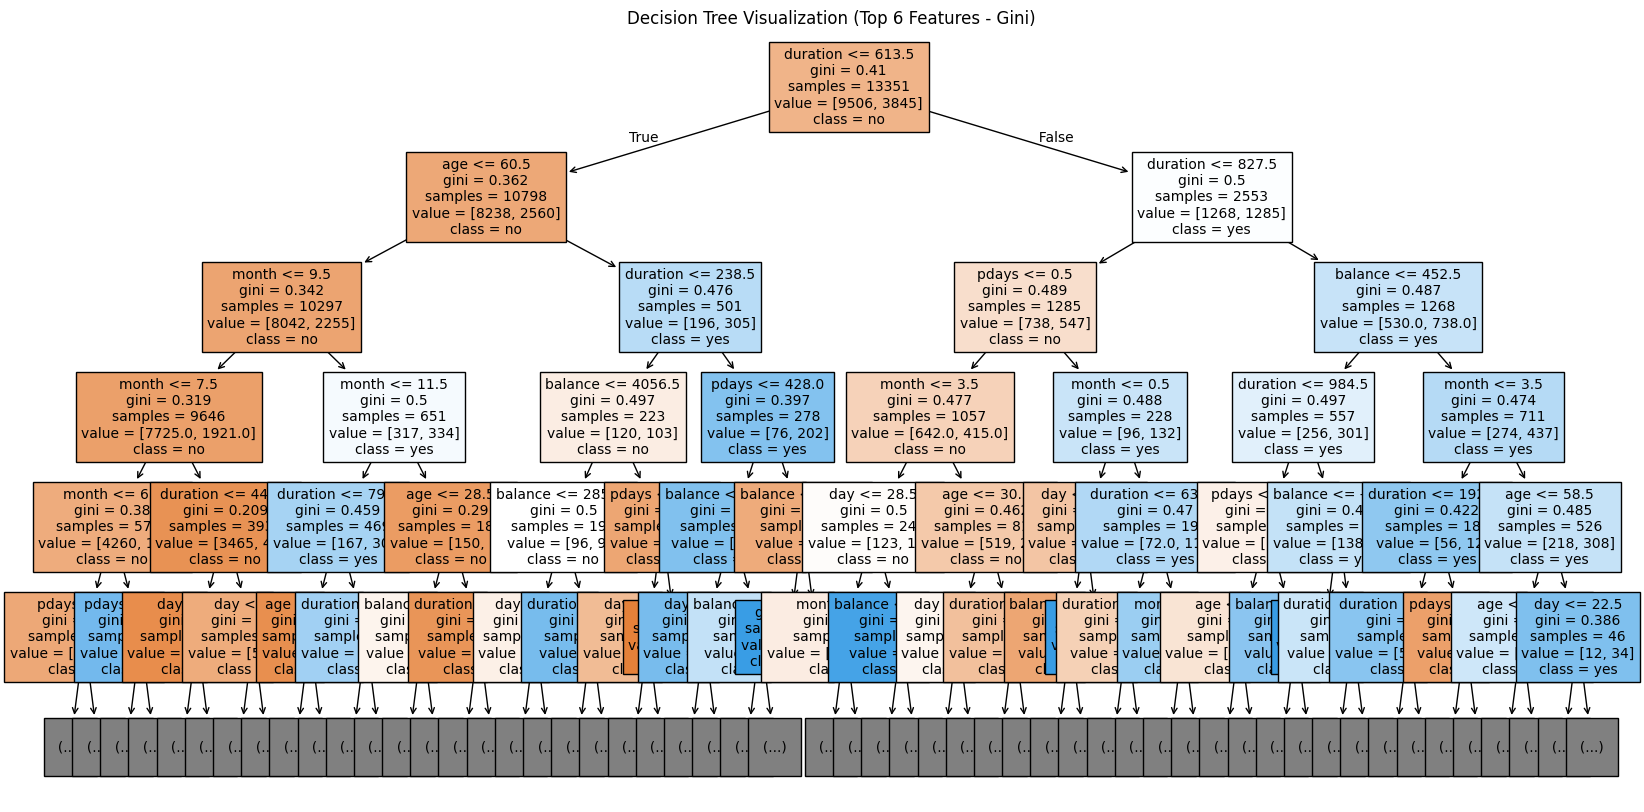

In [36]:
# Visualize the decision tree using only the top 6 features (Gini)
plt.figure(figsize=(20,10))
tree.plot_tree(clf_gini_top6, filled=True, feature_names=top_6_attributes.index, class_names=label_encoders['y'].classes_, max_depth=5, fontsize=10)
plt.title("Decision Tree Visualization (Top 6 Features - Gini)")
plt.show()

Call duration is the top factor again. Short calls lead to "no" outcomes, while longer ones lead to "yes."

On the Left Side: People contacted in later months, older customers, and those with lower balances are more likely to say "no."

On the Right Side: Higher balances and more recent contacts (shorter time since last contact) increase the chances of a "yes."

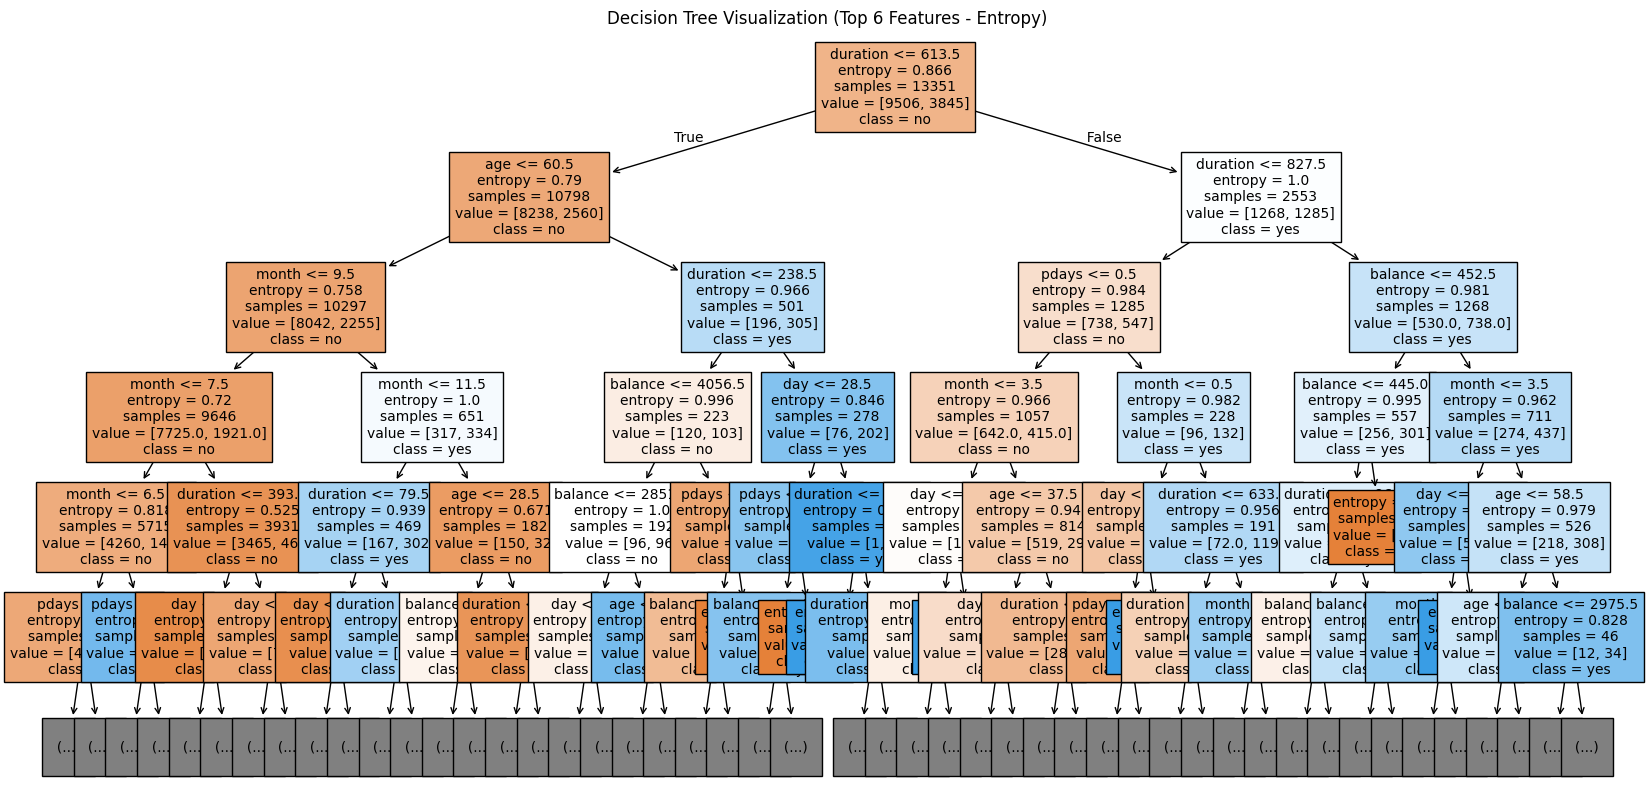

In [37]:
# Visualize the decision tree using only the top 6 features (Entropy)
plt.figure(figsize=(20,10))
tree.plot_tree(clf_entropy_top6, filled=True, feature_names=top_6_attributes.index, class_names=label_encoders['y'].classes_, max_depth=5, fontsize=10)
plt.title("Decision Tree Visualization (Top 6 Features - Entropy)")
plt.show()


The top factor in determining the outcomeis Call Duration, again. Shorter calls tend to result in "no" outcomes, while longer calls increase the likelihood of a "yes."

On the Left Side:

**Month of Contact**: People contacted in earlier months (lower month values) are more likely to say "no."

**Age**: Older customers, especially those over a certain age threshold, are more inclined to say "no."

**Balance**: Lower account balances further decrease the chances of a "yes."

On the Right Side:

**Balance**: Higher account balances increase the likelihood of a "yes."

**Recency of Contact (Pdays)**: More recent contacts (fewer days since last contact) also lead to higher chances of a "yes" outcome.